In [1]:
#Classifying night, portrait, landscape images using knn

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# function to extract rgb featire vectors from image
def image_to_feature_vector(image):
    size = (32, 32)
    img = cv2.resize(image, size)
    return img.flatten()


In [4]:
def extract_lab_histogram(image):

    # number of bins per channel
    bins = (8, 8, 8)

    # converting to Lab color space
    # Lumosity plays a big role here, night images will have less lumosity compared to portrait and landscape
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # extracting individual channel information as histogram from LAB color space
    lab_hist = cv2.calcHist([lab_image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    cv2.normalize(lab_hist, lab_hist)
    # flatten histogram to which is to be used as feature vector for classification
    return lab_hist.flatten()

In [5]:
def extract_hsv_histogram(image):

    # number of bins per channel
    bins = (8, 8, 8)

    # converting to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # the value channel in histogram is ranged from 200 to 255. This can prove good in classifying night images
    hsv_hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 255])

    cv2.normalize(hsv_hist, hsv_hist)
    # flatten histogram to which is to be used as feature vector for classification
    return hsv_hist.flatten()

In [6]:
rawImages = []
features = []
labels = []


In [7]:
# Reading images from disk
# since images are put into separate folder based on label, will be using these folder names as labels
dataset_dir = "dataset/"
for dir in os.listdir(dataset_dir):
    #print(dir)

    for root, subdir, files in os.walk(os.path.join(dataset_dir, dir)):
        for filename in files:
            #print(dir)
            #print(filename)
            image = cv2.imread(os.path.join(root, filename))
            label = dir

            # Extracting raw pixels from image as bgr
            #pixels = image_to_feature_vector(image)

            # Extracting LAB 3 channel histogram from image
            hist_lab = extract_lab_histogram(image)

            # Extracting HSV 3 channel histogram from image
            #hist_hsv = extract_hsv_histogram(image)

            # Creating feature vector as a combination of HSV and LAB histogram features. Provides better accuracy
            train_hist = hist_lab

            #rawImages.append(pixels)
            features.append(train_hist)

            labels.append(label)

In [8]:
# Splitting data into test and train. 80% of data will be used for training, 20% will be used for validation.
# (train_data, test_data, train_data_labels, test_data_labels) = train_test_split(
#      rawImages, labels, test_size=0.25, random_state=40)


# Splitting data into test and train. 80% of data will be used for training, 20% will be used for validation.
(train_features, test_features, train_labels, test_labels) = train_test_split(
	features, labels, test_size=0.25, random_state=40)


In [10]:
# train and evaluate an NN classifer on the histogram
# Traing KNN on features extracted from lab and hsv color spaces of image
print("Traning KNN starting ...")
model = KNeighborsClassifier(n_neighbors=5, metric="euclidean", algorithm="auto")
model.fit(train_features, train_labels)
print("Traning KNN ends ...")
acc = model.score(test_features, test_labels)
#print(type(acc))

test_res = model.predict(test_features)
print("Result of test dataset part for lab based features-> ")
print(test_res)

print("Accuracy achieved -> %.2f" %(acc * 100))

Traning KNN starting ...
Traning KNN ends ...
Result of test dataset part for lab based features-> 
['portrait' 'portrait' 'landscape' 'night' 'landscape' 'night' 'portrait'
 'portrait' 'night' 'night' 'landscape' 'night' 'portrait' 'portrait'
 'portrait' 'landscape' 'landscape' 'night' 'landscape' 'night' 'portrait'
 'landscape' 'portrait' 'landscape' 'night' 'portrait' 'landscape' 'night'
 'portrait' 'night' 'night' 'portrait' 'night' 'night' 'portrait'
 'landscape' 'portrait' 'night' 'night' 'landscape' 'portrait' 'landscape'
 'night' 'portrait' 'night' 'night' 'portrait' 'night' 'night' 'night'
 'night' 'landscape' 'landscape' 'portrait' 'night' 'landscape' 'night'
 'night' 'portrait' 'landscape' 'landscape' 'night' 'portrait' 'landscape'
 'landscape' 'night' 'landscape' 'portrait' 'night' 'landscape' 'night'
 'night' 'night' 'night' 'night' 'landscape' 'landscape' 'night' 'night'
 'night' 'landscape' 'landscape' 'night' 'portrait' 'portrait' 'portrait'
 'landscape' 'landscape' 'ni

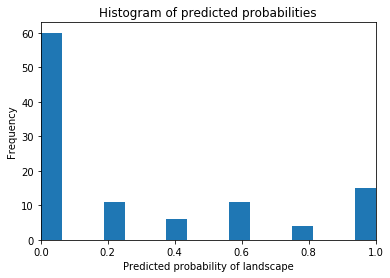

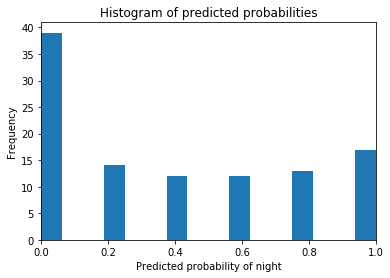

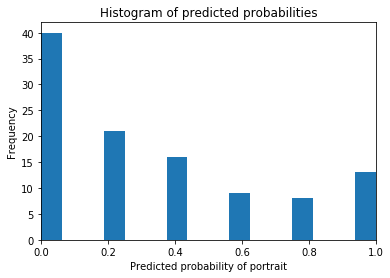

In [11]:

#print(metrics.confusion_matrix(test_labels, test_res))

y_pred_prob = model.predict_proba(test_features)[:, 0]
plt.hist(y_pred_prob, bins=16)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of landscape')
plt.ylabel('Frequency')
plt.show()


#print(metrics.confusion_matrix(test_labels, test_res))

y_pred_prob = model.predict_proba(test_features)[:, 1]
plt.hist(y_pred_prob, bins=16)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of night')
plt.ylabel('Frequency')
plt.show()


#print(metrics.confusion_matrix(test_labels, test_res))

y_pred_prob = model.predict_proba(test_features)[:, 2]
plt.hist(y_pred_prob, bins=16)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of portrait')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Testing our model -

image = cv2.imread("portrait_test.jpg")
hist_lab = extract_lab_histogram(image)

hist_modified = hist_lab

features=[]
features.append(hist_lab)
res = model.predict(features)
print("Predicted class/ label = ", res)

cv2.imshow("Image",image)
cv2.waitKey()
cv2.destroyAllWindows()

Predicted class/ label =  ['portrait']


In [22]:
# Testing our model -

image = cv2.imread("landscape_test.jpg")
hist_lab = extract_lab_histogram(image)

hist_modified = hist_lab

features=[]
features.append(hist_lab)
res = model.predict(features)
print("Predicted class/ label = ", res)

cv2.imshow("Image",image)
cv2.waitKey()
cv2.destroyAllWindows()

Predicted class/ label =  ['landscape']


In [23]:
# Testing our model -

image = cv2.imread("night_test.jpg")
hist_lab = extract_lab_histogram(image)

hist_modified = hist_lab

features=[]
features.append(hist_lab)
res = model.predict(features)
print("Predicted class/ label = ", res)

cv2.imshow("Image",image)
cv2.waitKey()
cv2.destroyAllWindows()

Predicted class/ label =  ['night']


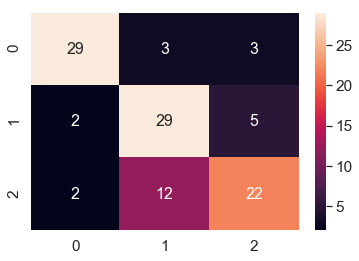

In [24]:
import pandas as pd
import seaborn as sn

conf_matrix = metrics.confusion_matrix(test_labels, test_res)

df_cm = pd.DataFrame(conf_matrix, range(3), range(3))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size